<a href="https://www.kaggle.com/code/ayushs9020/inventing-tokenizers-from-scratch-kaggle-ai?scriptVersionId=132589120" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Tokenizers 📝

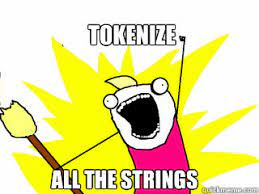

$Tokenizers$ are a `fundamental part` of $Nnatural$ $Language$ $Processing$ $NLP$. They are used to `break down text into smaller units`, called `tokens`, which can then be `processed` by $NLP$ models.

There are `different types` of tokenizers, each with its own `strengths` and `weaknesses`. Some tokenizers are `rule-based`, while others are `statistical`.

Tokenizers are an `essential tool` for $NLP$, and they play a `critical role` in the `development` of $NLP$ models.

Today we will try to make some of our `Tokenizers/Embeddings`.
* $Bag$ $Of$ $Words$ $(BOW)$

In [1]:
import numpy as np 
import pandas as pd 
import re

In [2]:
import nltk 
nltk.download("punkt")

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/2023-kaggle-ai-report/sample_submission.csv
/kaggle/input/2023-kaggle-ai-report/arxiv_metadata_20230510.json
/kaggle/input/2023-kaggle-ai-report/kaggle_writeups_20230510.csv


# 1 | Data Preprocessing ⚙️

<img src = "https://miro.medium.com/v2/resize:fit:862/1*bNSd-pm4XjkOV7uSTNAfnA.jpeg">

Lets get our data into working

In [4]:
data = pd.read_csv("/kaggle/input/2023-kaggle-ai-report/kaggle_writeups_20230510.csv")
data

,Competition Launch Date,Title of Competition,Competition URL,Date of Writeup,Title of Writeup,Writeup,Writeup URL
0,08/03/2010 00:00:00,Chess ratings - Elo versus the Rest of the World,https://www.kaggle.com/c/2447,11/18/2010 00:06:46,Released: my Source Code and Analysis,<p>I had a lot of fun with this competition an...,https://www.kaggle.com/c/2447/discussion/185
1,08/03/2010 00:00:00,Chess ratings - Elo versus the Rest of the World,https://www.kaggle.com/c/2447,11/20/2010 04:38:53,6th place(UriB) by Uri Blass,<P>I calculated rating for every player in mon...,https://www.kaggle.com/c/2447/discussion/192
2,08/03/2010 00:00:00,Chess ratings - Elo versus the Rest of the World,https://www.kaggle.com/c/2447,11/23/2010 10:38:23,7th place - littlefish,I'm a little surprised I ended up in the top-1...,https://www.kaggle.com/c/2447/discussion/194
3,08/03/2010 00:00:00,Chess ratings - Elo versus the Rest of the World,https://www.kaggle.com/c/2447,11/20/2010 11:27:17,3rd place: Chessmetrics - Variant,"<p><span id=""post_text_content_1230""><div dir=...",https://www.kaggle.com/c/2447/discussion/193
4,08/03/2010 00:00:00,Chess ratings - Elo versus the Rest of the World,https://www.kaggle.com/c/2447,11/18/2010 02:44:10,2nd place: TrueSkill Through Time,"Wow, this is a surprise! I looked at this comp...",https://www.kaggle.com/c/2447/discussion/186
...,...,...,...,...,...,...,...
3122,02/23/2023 17:25:32,Google - Isolated Sign Language Recognition,https://www.kaggle.com/c/46105,05/02/2023 09:45:01,49th place silver solution,<p>Thank you Kaggle and Pop sign for hosting t...,https://www.kaggle.com/c/46105/discussion/406426
3123,02/23/2023 17:25:32,Google - Isolated Sign Language Recognition,https://www.kaggle.com/c/46105,05/02/2023 10:13:31,10th place solution,"<blockquote>\n <p>First, I would like to than...",https://www.kaggle.com/c/46105/discussion/406434
3124,02/23/2023 17:25:32,Google - Isolated Sign Language Recognition,https://www.kaggle.com/c/46105,05/02/2023 03:24:28,Solution - Single transformer without val dataset,<p>Thanks to the organisers of the PopSign Gam...,https://www.kaggle.com/c/46105/discussion/406346
3125,02/23/2023 17:25:32,Google - Isolated Sign Language Recognition,https://www.kaggle.com/c/46105,05/02/2023 04:01:15,Top 8% Bronze Medal Solution,<blockquote>\n <p><strong>Many congratulation...,https://www.kaggle.com/c/46105/discussion/406354


At this point we will only focus on the `Writeup` column, we will try to access/process more information in the upcoming versions

Our data is distributed in a `CSV File`. We need to extract our data in a `txt File` as a large corpus of data

In [5]:
data["Writeup"]

0       <p>I had a lot of fun with this competition an...
1       <P>I calculated rating for every player in mon...
2       I'm a little surprised I ended up in the top-1...
3       <p><span id="post_text_content_1230"><div dir=...
4       Wow, this is a surprise! I looked at this comp...
                              ...                        
3122    <p>Thank you Kaggle and Pop sign for hosting t...
3123    <blockquote>\n  <p>First, I would like to than...
3124    <p>Thanks to the organisers of the PopSign Gam...
3125    <blockquote>\n  <p><strong>Many congratulation...
3126    <p>Thank you Kaggle, Kagglers, PopSign, and Pa...
Name: Writeup, Length: 3127, dtype: object

We just cant concatenate all of this into a single string. Let me show you how the data actually looks like

In [6]:
print(data["Writeup"][0])

<p>I had a lot of fun with this competition and learned a lot about ratings systems.</p>
<div>Sadly, I only came 18th :)</div>
<div>If you're interested, you can download all of my code and&nbsp;analysis&nbsp;from my github repo:&nbsp;https://github.com/jbrownlee/ChessML</div>
<div>There are implementations of a few rating systems (elo, glicko, chessmetrics, etc) and many attempts at improving them (a nice little experimentation framework).</div>
<div>Thanks all. Looking forward to the next big comp!</div>
<div>jasonb</div>


You can note that there are many of the `HTML tags` and other links provided in the data. We do not need these links, So it would be great if we juse remove all of this

In [7]:
print(
    re.sub(
        ':' , " " , 
        re.sub(
            ';' , ' ' , 
            re.sub(
                '&nbsp' , "" , 
        (
            re.sub(r'http\S+', ' ', 
            (
                re.compile(r'<.*?>').sub(
                    "" , 
                    data["Writeup"][0])
                )
            )
        )
            )
        )
    )
)

I had a lot of fun with this competition and learned a lot about ratings systems.
Sadly, I only came 18th  )
If you're interested, you can download all of my code and analysis from my github repo   
There are implementations of a few rating systems (elo, glicko, chessmetrics, etc) and many attempts at improving them (a nice little experimentation framework).
Thanks all. Looking forward to the next big comp!
jasonb


This thing still contains some emojis and other text. We should remove that as well 

In [8]:
emoj = re.compile("["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map symbols
    u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
    u"\U00002500-\U00002BEF"  # chinese char
    u"\U00002702-\U000027B0"
    u"\U00002702-\U000027B0"
    u"\U000024C2-\U0001F251"
    u"\U0001f926-\U0001f937"
    u"\U00010000-\U0010ffff"
    u"\u2640-\u2642" 
    u"\u2600-\u2B55"
    u"\u200d"
    u"\u23cf"
    u"\u23e9"
    u"\u231a"
    u"\ufe0f"  # dingbats
    u"\u3030"
    u"\u2028"
    "\x08"
    u"\u200a"
    u"\u200b"
                  "]+", re.UNICODE)

In [9]:
text = str()
for i in data["Writeup"]: 
    k = re.sub(
        ':' , " " , 
        re.sub(
            ';' , ' ' , 
            re.sub(
                '&nbsp' , '' , 
                (
                    re.sub(
                        r'http\S+', ' ', 
                        (
                            re.compile(r'<.*?>').sub("" , 
                            str(i))
                        )
                    )
                )
            )
        )
    )
    k = emoj.sub(r'' , k)
    text += k

Now we have a very large corpus of data 

# 2 | Bag Of Words 📚

<img src = "https://www.novuslight.com/uploads/n/BagofWords.jpg">

$Bag$ $Of$ $Words$ $(BoW)$ is a `text representation model` that `describes the occurrence of words` within a document $BOW$ is a `simple and flexible way` of `extracting features` from documents. It is commonly used in `methods of document classification` where the `frequency of occurrence` of `each word` is used as a `feature for training` a classifier. $BOW$ has been used for a variety of $Natural$ $Language$ $Processing$ $NLP$ tasks, including 
* $Text$ $Classification$
* $Text$ $Retrieval$
* $Sentiment$ $Analysis$

Lets assume we have this sentence

* $N$ is for the nice people I met
* $I$ is for the incredible times we spend together
* $G$ is for the great time we share
* $G$ is for the good memories we made 
* $E$ is for the excellent time we had
* $R$ is for the redicoulus moments we had together
* $S$ is for the special moments we made

In [10]:
sentence = ["N is for the nice people I met" , 
            "I is for the incredible times we spend together" , 
            "G is for the great time we share" , 
            "G is for the good memories we made" , 
            "E is for the excellent time we had" , 
            "R is for the redicoulus moments we had together" , 
            "S is for the special moments we made "]

Lets just try to manually type the unique words in the combined sentences into a dictionary

In [11]:
unique_values = {"N" , "is" ,  "for" , "the" , "nice" , 
                 "people" , "met" , "I" , "incredible" , "times" , 
                 "we" , "spend" , "great" , "share" , "G" , "good" ,
                 "memories" , "E" , "excellent" , "time" , "R" , 
                 "redicoulus" , "had" , "together" , "S" , 
                 "special" , "moments" , "made "}

And that took me an eternity. I dont think doing this menaul work will be good for the large corupus of data we have

But we have specialized library for that 

In [12]:
nltk.tokenize.word_tokenize(text)

['I',
 'had',
 'a',
 'lot',
 'of',
 'fun',
 'with',
 'this',
 'competition',
 'and',
 'learned',
 'a',
 'lot',
 'about',
 'ratings',
 'systems',
 '.',
 'Sadly',
 ',',
 'I',
 'only',
 'came',
 '18th',
 ')',
 'If',
 'you',
 "'re",
 'interested',
 ',',
 'you',
 'can',
 'download',
 'all',
 'of',
 'my',
 'code',
 'and',
 'analysis',
 'from',
 'my',
 'github',
 'repo',
 'There',
 'are',
 'implementations',
 'of',
 'a',
 'few',
 'rating',
 'systems',
 '(',
 'elo',
 ',',
 'glicko',
 ',',
 'chessmetrics',
 ',',
 'etc',
 ')',
 'and',
 'many',
 'attempts',
 'at',
 'improving',
 'them',
 '(',
 'a',
 'nice',
 'little',
 'experimentation',
 'framework',
 ')',
 '.',
 'Thanks',
 'all',
 '.',
 'Looking',
 'forward',
 'to',
 'the',
 'next',
 'big',
 'comp',
 '!',
 'jasonbI',
 'calculated',
 'rating',
 'for',
 'every',
 'player',
 'in',
 'months',
 '101-105',
 'and',
 'after',
 'having',
 'the',
 'rating',
 'I',
 'have',
 'a',
 'simple',
 'formula',
 'to',
 'calculate',
 'the',
 'expected',
 'result',
 

But we do not need `,` , `.` or any other characters like that 

In [13]:
vocab = [
    word.lower() 
    for word in nltk.tokenize.word_tokenize(text) 
    if word.isalpha() 
]
vocab

['i',
 'had',
 'a',
 'lot',
 'of',
 'fun',
 'with',
 'this',
 'competition',
 'and',
 'learned',
 'a',
 'lot',
 'about',
 'ratings',
 'systems',
 'sadly',
 'i',
 'only',
 'came',
 'if',
 'you',
 'interested',
 'you',
 'can',
 'download',
 'all',
 'of',
 'my',
 'code',
 'and',
 'analysis',
 'from',
 'my',
 'github',
 'repo',
 'there',
 'are',
 'implementations',
 'of',
 'a',
 'few',
 'rating',
 'systems',
 'elo',
 'glicko',
 'chessmetrics',
 'etc',
 'and',
 'many',
 'attempts',
 'at',
 'improving',
 'them',
 'a',
 'nice',
 'little',
 'experimentation',
 'framework',
 'thanks',
 'all',
 'looking',
 'forward',
 'to',
 'the',
 'next',
 'big',
 'comp',
 'jasonbi',
 'calculated',
 'rating',
 'for',
 'every',
 'player',
 'in',
 'months',
 'and',
 'after',
 'having',
 'the',
 'rating',
 'i',
 'have',
 'a',
 'simple',
 'formula',
 'to',
 'calculate',
 'the',
 'expected',
 'result',
 'only',
 'based',
 'on',
 'the',
 'rating',
 'and',
 'the',
 'tricks',
 'that',
 'i',
 'used',
 'were',
 'mainly'

Now we will try to assign `index` to each word in a dictionary. So that we can use that later

In [14]:
stoi = {
    ch:i 
    for i,ch in enumerate(vocab)
}
stoi

{'i': 1433694,
 'had': 1432788,
 'a': 1433611,
 'lot': 1432890,
 'of': 1433536,
 'fun': 1433071,
 'with': 1433555,
 'this': 1433701,
 'competition': 1433530,
 'and': 1433685,
 'learned': 1432703,
 'about': 1433691,
 'ratings': 1423164,
 'systems': 1418152,
 'sadly': 1376755,
 'only': 1433678,
 'came': 1432684,
 'if': 1432839,
 'you': 1433063,
 'interested': 1377999,
 'can': 1433609,
 'download': 1333733,
 'all': 1433712,
 'my': 1433297,
 'code': 1433261,
 'analysis': 1412968,
 'from': 1433681,
 'github': 1432835,
 'repo': 1422968,
 'there': 1432940,
 'are': 1433283,
 'implementations': 1403932,
 'few': 1432795,
 'rating': 1423305,
 'elo': 1423340,
 'glicko': 45,
 'chessmetrics': 2211,
 'etc': 1432557,
 'many': 1433664,
 'attempts': 1425182,
 'at': 1433565,
 'improving': 1429034,
 'them': 1432686,
 'nice': 1415583,
 'little': 1432266,
 'experimentation': 1412852,
 'framework': 1431942,
 'thanks': 1432666,
 'looking': 1432423,
 'forward': 1431505,
 'to': 1433714,
 'the': 1433641,
 'next'

In this we mapped `str` to `integers`.

Now we will try to map `integers` to `str`

In [15]:
itos = {
    i:ch 
    for i,ch in enumerate(vocab)
}
itos

{0: 'i',
 1: 'had',
 2: 'a',
 3: 'lot',
 4: 'of',
 5: 'fun',
 6: 'with',
 7: 'this',
 8: 'competition',
 9: 'and',
 10: 'learned',
 11: 'a',
 12: 'lot',
 13: 'about',
 14: 'ratings',
 15: 'systems',
 16: 'sadly',
 17: 'i',
 18: 'only',
 19: 'came',
 20: 'if',
 21: 'you',
 22: 'interested',
 23: 'you',
 24: 'can',
 25: 'download',
 26: 'all',
 27: 'of',
 28: 'my',
 29: 'code',
 30: 'and',
 31: 'analysis',
 32: 'from',
 33: 'my',
 34: 'github',
 35: 'repo',
 36: 'there',
 37: 'are',
 38: 'implementations',
 39: 'of',
 40: 'a',
 41: 'few',
 42: 'rating',
 43: 'systems',
 44: 'elo',
 45: 'glicko',
 46: 'chessmetrics',
 47: 'etc',
 48: 'and',
 49: 'many',
 50: 'attempts',
 51: 'at',
 52: 'improving',
 53: 'them',
 54: 'a',
 55: 'nice',
 56: 'little',
 57: 'experimentation',
 58: 'framework',
 59: 'thanks',
 60: 'all',
 61: 'looking',
 62: 'forward',
 63: 'to',
 64: 'the',
 65: 'next',
 66: 'big',
 67: 'comp',
 68: 'jasonbi',
 69: 'calculated',
 70: 'rating',
 71: 'for',
 72: 'every',
 73: '

Now lets create a function for this thing 

In [16]:
bag_of_words = lambda sample_text : {
    ch:i 
    for i,ch in enumerate([
        word.lower() 
        for word in nltk.tokenize.word_tokenize(sample_text) 
        if word.isalpha() 
    ])
}

In [17]:
bag_of_words("Dang Like Ohio , Swag Like Ohio")

{'dang': 0, 'like': 4, 'ohio': 5, 'swag': 3}

# 3 | TF-IDF 🚀

Lets assume we want to calculate how often a `t` appears in the document 

In [18]:
len([token for token in text if token == "t"])/len(text)

0.06789551951247542

In [19]:
def termfreq(document, word):
    N = len(document)
    occurance = len([token for token in document if token == word])
    return occurance/N

We can asusme that if we choose $10,000$ we will get $6$ time `t`. 

If we want to get the most usefull words. We can use this techqniue. 

But there is problem with this. This also includes words like `are` ,`is`, which occur frequently but are of less use 

Thats why we use the concept of `Inverse Document Frequeny`. The formula for this is $$log(\frac{n}{o})$$

where 
* $n = len(word)$
* $o = word occurence $

In [20]:
def inverse_doc_freq(word):
    try:
        word_occurance = stoi[word] + 1
    except:
        word_occurance = 1 
    return np.log(len(data)/word_occurance)

$TF-IDF$ is just the `Term Frequency` $*$ `Inverse Document Frequency`, so now we just need to combine these $2$

In [21]:
def tf_idf(sentence):
    tf_idf_vec = np.zeros((len(vocab),))
    for word in sentence:
        tf = termfreq(sentence,word)
        idf = inverse_doc_freq(word)        
        value = tf*idf
        tf_idf_vec[indices[word]] = value 
    return tf_idf_vec

Now we will jsut combine all our functions 

In [22]:
def TF_IDF(data):
    
    vocab = sorted(list(set(data)))
    indices = {}
    i = 0
    
    for word in vocab:
        
        indices[word] = i
        i += 1

    def count_dict(data):
        
        word_count = {}
        
        for word in vocab:
            
            word_count[word] = 0
            
            for sent in data:
                
                if word in sent:
                    
                    word_count[word] += 1
        
        return word_count
    
    word_count = count_dict(data)

    def termfreq(document, word):
        
        N = len(document)
        occurance = len([token for token in document if token == word])
        
        return occurance/N

    def inverse_doc_freq(word):
        
        try:
            
            word_occurance = word_count[word] + 1
        
        except:
            
            word_occurance = 1 
        
        return np.log(len(data)/word_occurance)

    def tf_idf(sentence):
        
        tf_idf_vec = np.zeros((len(vocab),))
        
        for word in sentence:
        
            tf = termfreq(sentence,word)
            idf = inverse_doc_freq(word)        
            
            value = tf*idf
            
            tf_idf_vec[indices[word]] = value 
        
        return tf_idf_vec

    vectors = [tf_idf(sent) for sent in data]
            
    return vectors

**THATS IT FOR TODAY GUYS**

**THIS INCLUDES NOT THE TOKENIZERS WE HAVE**

**WE HAVE A LOT MORE**

**WE WILL TRY TO EXPLORE MORE TOKENIZERS IN THE UPCOMING VERSIONS**

**PLEASE COMMENT YOUR THOUGHTS, HIHGLY APPRICIATED**

**DONT FORGET TO MAKE AN UPVOTE, IF YOU LIKED MY WORK**

<img src = "https://i.imgflip.com/19aadg.jpg">

**PEACE OUT $:)$**